<a href="https://colab.research.google.com/github/XavierCarrera/Blood-Stream-App/blob/master/Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Librerias

import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Abrimos el doc un drive

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks/db'
!ls

/content/drive/My Drive/Colab Notebooks/db
appstore_games.csv	     iris-data.csv	     rating-peliculas.csv
bicicletas-compartidas.csv   juego-azar.csv	     titanic-master-table.csv
clean-dataset.csv	     london_merged.csv	     train.csv
compensacion-ejecutivos.sav  Meteorite_Landings.csv
covid_19_data.csv	     poblacion.csv


In [ ]:
# Hace el dataframe

df = pd.read_csv('appstore_games.csv')

In [ ]:
# Verificar columnas

df.columns

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')

In [ ]:
#Eliminar columnnas innecesarias

df = df.drop(['Price', 'In-app Purchases'], axis = 1)

In [ ]:
df.columns

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Description', 'Developer', 'Age Rating',
       'Languages', 'Size', 'Primary Genre', 'Genres', 'Original Release Date',
       'Current Version Release Date'],
      dtype='object')

In [ ]:
# Verificación de NA y porcentajes de NA

df.isna().sum(axis=0)/len(df)*100 

URL                              0.000000
ID                               0.000000
Name                             0.000000
Subtitle                        69.065679
Icon URL                         0.000000
Average User Rating             55.541836
User Rating Count               55.541836
Description                      0.000000
Developer                        0.000000
Age Rating                       0.000000
Languages                        0.352796
Size                             0.005880
Primary Genre                    0.000000
Genres                           0.000000
Original Release Date            0.000000
Current Version Release Date     0.000000
dtype: float64

In [ ]:
# Borrar columnas con +50% datos nulas

df = df.drop(['Subtitle'], axis = 1)

In [ ]:
df.columns

Index(['URL', 'ID', 'Name', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Description', 'Developer', 'Age Rating',
       'Languages', 'Size', 'Primary Genre', 'Genres', 'Original Release Date',
       'Current Version Release Date'],
      dtype='object')

In [ ]:
df = df.drop_duplicates()

In [ ]:
# Borrar datos nulos, usando columnos indece

df = df.drop(df[df.Languages == ''].index)

In [ ]:
df = df.drop(df[df.Size == ''].index)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [ ]:
df

,URL,ID,Name,Icon URL,Average User Rating,User Rating Count,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17002,https://apps.apple.com/us/app/stack-puzzle-ris...,1474626442,Stack Puzzle : Rise Tower,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,"The goal is very simple, move the square horiz...",Zhigang Pei,4+,EN,64795648.0,Games,"Games, Entertainment, Casual, Strategy",30/07/2019,30/07/2019
17003,https://apps.apple.com/us/app/eachother/id1474...,1474919257,EachOther,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,Collect a score while you play!!\n\nBy linking...,Sultan Shindi,4+,EN,110341120.0,Games,"Games, Family, Strategy",1/08/2019,1/08/2019
17004,https://apps.apple.com/us/app/rabbit-vs-tortoi...,1474962324,Rabbit Vs Tortoise,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,"""Rabbit Vs Tortoise is chess type cool simple ...",Vishal Baldha,4+,EN,23207936.0,Games,"Games, Strategy",3/08/2019,3/08/2019
17005,https://apps.apple.com/us/app/fatall/id1474963671,1474963671,FaTaLL,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,Upgrade your character and use your skills to ...,Tayrem Games,4+,EN,196750336.0,Games,"Games, Strategy, Action",1/08/2019,1/08/2019


In [ ]:
# Verificación de NA y porcentajes de NA

df.isna().sum(axis=0)/len(df)*100

URL                              0.000000
ID                               0.000000
Name                             0.000000
Icon URL                         0.000000
Average User Rating             55.552917
User Rating Count               55.552917
Description                      0.000000
Developer                        0.000000
Age Rating                       0.000000
Languages                        0.356146
Size                             0.005936
Primary Genre                    0.000000
Genres                           0.000000
Original Release Date            0.000000
Current Version Release Date     0.000000
dtype: float64

In [ ]:
df = df.drop(['Average User Rating', 'User Rating Count'], axis = 1)

In [ ]:
df.columns

Index(['URL', 'ID', 'Name', 'Icon URL', 'Description', 'Developer',
       'Age Rating', 'Languages', 'Size', 'Primary Genre', 'Genres',
       'Original Release Date', 'Current Version Release Date'],
      dtype='object')

In [ ]:
spec_chars = ['"']

for char in spec_chars:
  df['Name'] = df['Name'].str.replace(char, '') 
  df['Description'] = df['Description'].str.replace(char, '')

In [ ]:
df

,URL,ID,Name,Icon URL,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),https://is3-ssl.mzstatic.com/image/thumb/Purpl...,Top 100 free app for over a year.\nRated Best ...,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,Senet Deluxe - The Ancient Game of Life and Af...,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17002,https://apps.apple.com/us/app/stack-puzzle-ris...,1474626442,Stack Puzzle : Rise Tower,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,"The goal is very simple, move the square horiz...",Zhigang Pei,4+,EN,64795648.0,Games,"Games, Entertainment, Casual, Strategy",30/07/2019,30/07/2019
17003,https://apps.apple.com/us/app/eachother/id1474...,1474919257,EachOther,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,Collect a score while you play!!\n\nBy linking...,Sultan Shindi,4+,EN,110341120.0,Games,"Games, Family, Strategy",1/08/2019,1/08/2019
17004,https://apps.apple.com/us/app/rabbit-vs-tortoi...,1474962324,Rabbit Vs Tortoise,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,Rabbit Vs Tortoise is chess type cool simple g...,Vishal Baldha,4+,EN,23207936.0,Games,"Games, Strategy",3/08/2019,3/08/2019
17005,https://apps.apple.com/us/app/fatall/id1474963671,1474963671,FaTaLL,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,Upgrade your character and use your skills to ...,Tayrem Games,4+,EN,196750336.0,Games,"Games, Strategy, Action",1/08/2019,1/08/2019


In [ ]:
df.isna().sum(axis=0)

URL                              0
ID                               0
Name                             0
Icon URL                         0
Description                      0
Developer                        0
Age Rating                       0
Languages                       60
Size                             1
Primary Genre                    0
Genres                           0
Original Release Date            0
Current Version Release Date     0
dtype: int64

In [ ]:
df = df.dropna(subset=['Languages'])

In [ ]:
df = df.dropna(subset=['Size'])

In [ ]:
df.isna().sum(axis=0)

URL                             0
ID                              0
Name                            0
Icon URL                        0
Description                     0
Developer                       0
Age Rating                      0
Languages                       0
Size                            0
Primary Genre                   0
Genres                          0
Original Release Date           0
Current Version Release Date    0
dtype: int64

In [ ]:
df.columns

Index(['URL', 'ID', 'Name', 'Icon URL', 'Description', 'Developer',
       'Age Rating', 'Languages', 'Size', 'Primary Genre', 'Genres',
       'Original Release Date', 'Current Version Release Date'],
      dtype='object')

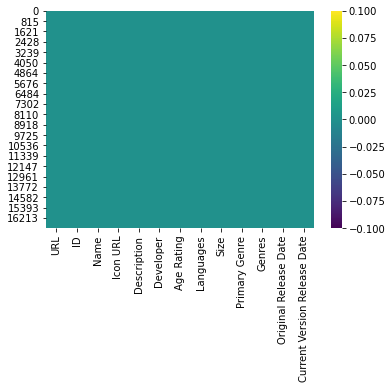

In [ ]:
sns.heatmap(df.isnull(), cmap='viridis')

In [ ]:
from google.colab import files
df.to_csv('clean-dataset.csv') 
files.download('clean-dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
df.to_csv('test_dataset.csv') 
files.download('clean-dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>